In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data
data = pd.read_csv('/Users/eeevashen/Desktop/Apple_stock_data_6M.csv',low_memory=False)
# take out the Date column and Close/Last column
data = data[['Date','Close/Last']]
# make the whole dataframe upside down
data = data[::-1]
# seperate the Date column by month
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month

In [3]:
# print the first 5 rows of the data and the last 5 rows of the data
print(data.head())
print(data.tail())

          Date Close/Last  Month
124 2023-12-18    $195.89     12
123 2023-12-19    $196.94     12
122 2023-12-20    $194.83     12
121 2023-12-21    $194.68     12
120 2023-12-22    $193.60     12
        Date Close/Last  Month
4 2024-06-11    $207.15      6
3 2024-06-12    $213.07      6
2 2024-06-13    $214.24      6
1 2024-06-14    $212.49      6
0 2024-06-17    $216.67      6


In [4]:
# make the Date column as string as the format of 'YYYY-MM-DD'
data['Date'] = data['Date'].dt.strftime('%Y-%m-%d')
# make the Close/Last column as float
data['Close/Last'] = data['Close/Last'].str.replace('$','').astype(float)
# make the Date column and Close/Last column as a tuple
tuple_data = list(zip(data['Date'],data['Close/Last']))

In [5]:
print(tuple_data)     # tupeel_data is a list of tuple
print(type(tuple_data[0])) # a pair like ('2024-06-17', '$216.67')
print(type(tuple_data[0][0]),type(tuple_data[0][1])) # <class 'str'> <class 'str'>
# take out the second element of the tuple_data and make it as a array
# delete the $ sign and convert the string to float
price = [i[1] for i in tuple_data]
print(price)

[('2023-12-18', 195.89), ('2023-12-19', 196.94), ('2023-12-20', 194.83), ('2023-12-21', 194.68), ('2023-12-22', 193.6), ('2023-12-26', 193.05), ('2023-12-27', 193.15), ('2023-12-28', 193.58), ('2023-12-29', 192.53), ('2024-01-02', 185.64), ('2024-01-03', 184.25), ('2024-01-04', 181.91), ('2024-01-05', 181.18), ('2024-01-08', 185.56), ('2024-01-09', 185.14), ('2024-01-10', 186.19), ('2024-01-11', 185.59), ('2024-01-12', 185.92), ('2024-01-16', 183.63), ('2024-01-17', 182.68), ('2024-01-18', 188.63), ('2024-01-19', 191.56), ('2024-01-22', 193.89), ('2024-01-23', 195.18), ('2024-01-24', 194.5), ('2024-01-25', 194.17), ('2024-01-26', 192.42), ('2024-01-29', 191.73), ('2024-01-30', 188.04), ('2024-01-31', 184.4), ('2024-02-01', 186.86), ('2024-02-02', 185.85), ('2024-02-05', 187.68), ('2024-02-06', 189.3), ('2024-02-07', 189.41), ('2024-02-08', 188.32), ('2024-02-09', 188.85), ('2024-02-12', 187.15), ('2024-02-13', 185.04), ('2024-02-14', 184.15), ('2024-02-15', 183.86), ('2024-02-16', 182.

In [6]:
def one_pass_bar_algorithm(time_series, date_list=None):
    bar_list = []
    maxima, minima = [], []
    direction = 1

    # add a very small point at the front of the time_series
    time_series = [time_series[0] - 1e-6] + time_series
    # add a very big point at the end of the time_series
    time_series = time_series + [time_series[-1] + 1e-6]

    for t in range(0, len(time_series)-1):
        if (time_series[t+1] - time_series[t]) * direction < 0:
            if direction == 1:
                if len(maxima) != 0 and time_series[t] > maxima[-1][1]:
                    output_bar(maxima.pop(), minima.pop(),date_list, bar_list)
                maxima.append((t, time_series[t])) 
            else:
                if len(minima) != 0 and time_series[t] < minima[-1][1]:
                    output_bar(maxima.pop(), minima.pop(),date_list, bar_list)
                minima.append((t, time_series[t]))
            direction = -direction
        else:
          if direction == 1 and len(maxima) != 0 and time_series[t] > maxima[-1][1]:
              output_bar(maxima.pop(), minima.pop(),date_list, bar_list)
          elif direction == -1 and len(minima) != 0 and time_series[t] < minima[-1][1]:
              output_bar(maxima.pop(), minima.pop(),date_list, bar_list)
    output_remaining_bars(maxima, minima, date_list, bar_list)
    return bar_list

def output_bar(max_value, min_value, date_list, bar_list):
    if date_list is None:
        length = max_value[1] - min_value[1]
        print(f"(normal)Bar: ({max_value[0]}, {max_value[1]}) to ({min_value[0]}, {min_value[1]}), length: {length}")
        bar_list.append(((max_value[0], max_value[1]), (min_value[0], min_value[1])))

    else:
        length = max_value[1] - min_value[1]
        print(f"(normal)Bar: ({date_list[max_value[0]-1]}, {max_value[1]}) to ({date_list[min_value[0]-1]}, {min_value[1]}), length: {length}")
        bar_list.append(((date_list[max_value[0]-1], max_value[1]), (date_list[min_value[0]-1], min_value[1])))

def output_remaining_bars(maxima, minima, date_list, bar_list):
    if date_list is None:
        for i in range(min(len(maxima), len(minima))):
            length = maxima[i][1] - minima[i][1]
            print(f"(remaining)Bar: ({maxima[i][0]}, {maxima[i][1]}) to ({minima[i][0]}, {minima[i][1]}), length: {length}")
            bar_list.append(((maxima[i][0], maxima[i][1]),  (minima[i][0], minima[i][1])))

    else:
        for i in range(min(len(maxima), len(minima))):
            length = maxima[i][1] - minima[i][1]
            print(f"(remaining)Bar: ({date_list[maxima[i][0]-1]}, {maxima[i][1]}) to ({date_list[minima[i][0]-1]}, {minima[i][1]}), length: {length}")
            bar_list.append(((date_list[maxima[i][0]-1], maxima[i][1]), (date_list[minima[i][0]-1], minima[i][1])))


In [7]:
one_pass_bar_algorithm(price)

(normal)Bar: (8, 193.58) to (6, 193.05)
(normal)Bar: (14, 185.56) to (15, 185.14)
(normal)Bar: (18, 185.92) to (17, 185.59)
(normal)Bar: (16, 186.19) to (20, 182.68)
(normal)Bar: (31, 186.86) to (32, 185.85)
(normal)Bar: (37, 188.85) to (36, 188.32)
(normal)Bar: (35, 189.41) to (30, 184.4)
(normal)Bar: (45, 184.37) to (43, 181.56)
(normal)Bar: (48, 182.63) to (47, 181.16)
(normal)Bar: (24, 195.18) to (13, 181.18)
(normal)Bar: (60, 173.0) to (61, 172.62)
(normal)Bar: (58, 173.23) to (59, 171.13)
(normal)Bar: (66, 172.28) to (65, 171.37)
(normal)Bar: (69, 173.31) to (68, 169.71)
(normal)Bar: (73, 169.65) to (72, 168.84)
(normal)Bar: (75, 169.58) to (74, 168.82)
(normal)Bar: (77, 169.67) to (76, 168.45)
(normal)Bar: (80, 176.55) to (78, 167.78)
(normal)Bar: (64, 178.67) to (55, 169.0)
(normal)Bar: (89, 169.89) to (90, 169.3)
(normal)Bar: (91, 173.5) to (93, 169.3)
(normal)Bar: (95, 183.38) to (96, 181.71)
(normal)Bar: (99, 184.57) to (100, 183.05)
(normal)Bar: (107, 192.35) to (109, 186.8

[((8, 193.58), (6, 193.05)),
 ((14, 185.56), (15, 185.14)),
 ((18, 185.92), (17, 185.59)),
 ((16, 186.19), (20, 182.68)),
 ((31, 186.86), (32, 185.85)),
 ((37, 188.85), (36, 188.32)),
 ((35, 189.41), (30, 184.4)),
 ((45, 184.37), (43, 181.56)),
 ((48, 182.63), (47, 181.16)),
 ((24, 195.18), (13, 181.18)),
 ((60, 173.0), (61, 172.62)),
 ((58, 173.23), (59, 171.13)),
 ((66, 172.28), (65, 171.37)),
 ((69, 173.31), (68, 169.71)),
 ((73, 169.65), (72, 168.84)),
 ((75, 169.58), (74, 168.82)),
 ((77, 169.67), (76, 168.45)),
 ((80, 176.55), (78, 167.78)),
 ((64, 178.67), (55, 169.0)),
 ((89, 169.89), (90, 169.3)),
 ((91, 173.5), (93, 169.3)),
 ((95, 183.38), (96, 181.71)),
 ((99, 184.57), (100, 183.05)),
 ((107, 192.35), (109, 186.88)),
 ((117, 195.87), (118, 194.48)),
 ((119, 196.89), (120, 193.12)),
 ((2, 196.94), (85, 165.0)),
 ((123, 214.24), (124, 212.49))]

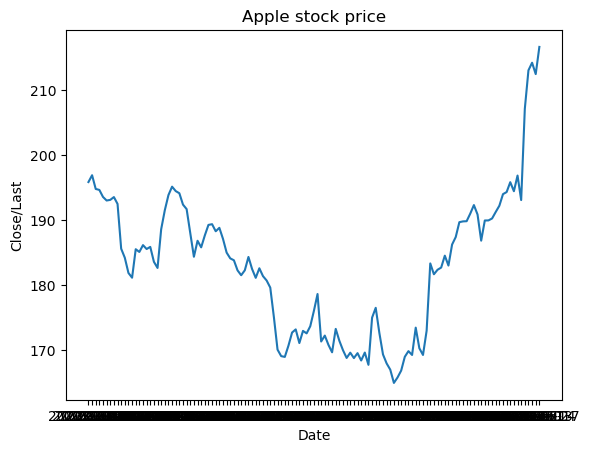

In [8]:
# plot the stock price and Date 
# add a very small point at the front of the time_series
price = [price[0] - 1e-6] + price
plt.plot(data['Date'],data['Close/Last'])
plt.xlabel('Date')
plt.ylabel('Close/Last')
plt.title('Apple stock price')
plt.show()

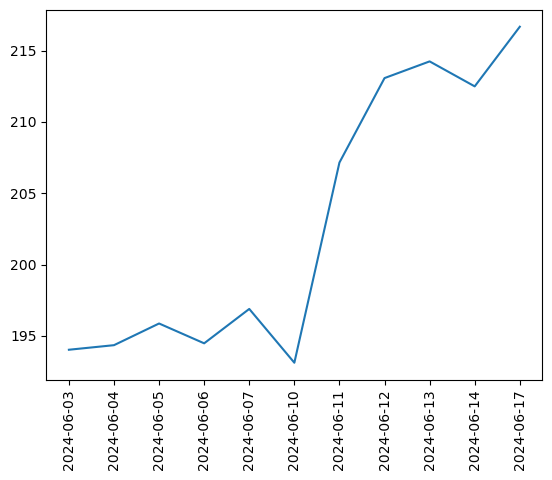

In [9]:
# pick one month data to plot
data_1 = data[data['Month']==6]
plt.plot(data_1['Date'],data_1['Close/Last'])
# make the x-axis label lilted
plt.xticks(rotation=90)
plt.show()

In [10]:
# get all data of month == 6
data_6 = data[data['Month']==6]
print(data_6)
# take out the Close/Last column and make it as a list
price_6 = data_6['Close/Last'].tolist()
print(price_6)
# take out the Date column and make it as a list
date_6 = data_6['Date'].tolist()
print(date_6)

          Date  Close/Last  Month
10  2024-06-03      194.03      6
9   2024-06-04      194.35      6
8   2024-06-05      195.87      6
7   2024-06-06      194.48      6
6   2024-06-07      196.89      6
5   2024-06-10      193.12      6
4   2024-06-11      207.15      6
3   2024-06-12      213.07      6
2   2024-06-13      214.24      6
1   2024-06-14      212.49      6
0   2024-06-17      216.67      6
[194.03, 194.35, 195.87, 194.48, 196.89, 193.12, 207.15, 213.07, 214.24, 212.49, 216.67]
['2024-06-03', '2024-06-04', '2024-06-05', '2024-06-06', '2024-06-07', '2024-06-10', '2024-06-11', '2024-06-12', '2024-06-13', '2024-06-14', '2024-06-17']


In [11]:
one_pass_bar_algorithm(price_6, date_6)

(normal)Bar: (2024-06-05, 195.87) to (2024-06-06, 194.48)
(normal)Bar: (2024-06-07, 196.89) to (2024-06-10, 193.12)
(normal)Bar: (2024-06-13, 214.24) to (2024-06-14, 212.49)


[(('2024-06-05', 195.87), ('2024-06-06', 194.48)),
 (('2024-06-07', 196.89), ('2024-06-10', 193.12)),
 (('2024-06-13', 214.24), ('2024-06-14', 212.49))]

In [12]:
# get all data of month == 2
data_2 = data[data['Month']==2]
# take out the Close/Last column and make it as a list
price_2 = data_2['Close/Last'].tolist()
# take out the Date column and make it as a list
date_2 = data_2['Date'].tolist()

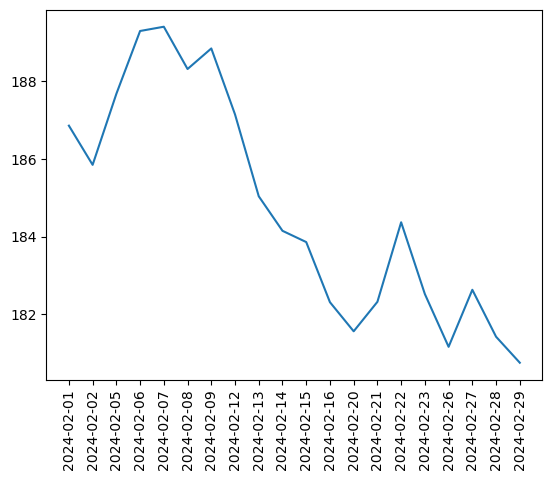

In [13]:
plt.plot(data_2['Date'],data_2['Close/Last'])
# make the x-axis label lilted
plt.xticks(rotation=90)
plt.show()

In [14]:
one_pass_bar_algorithm(price_2, date_2)

(normal)Bar: (2024-02-01, 186.86) to (2024-02-02, 185.85)
(normal)Bar: (2024-02-09, 188.85) to (2024-02-08, 188.32)
(normal)Bar: (2024-02-22, 184.37) to (2024-02-20, 181.56)
(normal)Bar: (2024-02-27, 182.63) to (2024-02-26, 181.16)
(remaining)Bar: (2024-02-07, 189.41) to (2024-02-29, 180.75)


[(('2024-02-01', 186.86), ('2024-02-02', 185.85)),
 (('2024-02-09', 188.85), ('2024-02-08', 188.32)),
 (('2024-02-22', 184.37), ('2024-02-20', 181.56)),
 (('2024-02-27', 182.63), ('2024-02-26', 181.16)),
 (('2024-02-07', 189.41), ('2024-02-29', 180.75))]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, '2024-04-01'),
  Text(1, 0, '2024-04-02'),
  Text(2, 0, '2024-04-03'),
  Text(3, 0, '2024-04-04'),
  Text(4, 0, '2024-04-05'),
  Text(5, 0, '2024-04-08'),
  Text(6, 0, '2024-04-09'),
  Text(7, 0, '2024-04-10'),
  Text(8, 0, '2024-04-11'),
  Text(9, 0, '2024-04-12'),
  Text(10, 0, '2024-04-15'),
  Text(11, 0, '2024-04-16'),
  Text(12, 0, '2024-04-17'),
  Text(13, 0, '2024-04-18'),
  Text(14, 0, '2024-04-19'),
  Text(15, 0, '2024-04-22'),
  Text(16, 0, '2024-04-23'),
  Text(17, 0, '2024-04-24'),
  Text(18, 0, '2024-04-25'),
  Text(19, 0, '2024-04-26'),
  Text(20, 0, '2024-04-29'),
  Text(21, 0, '2024-04-30')])

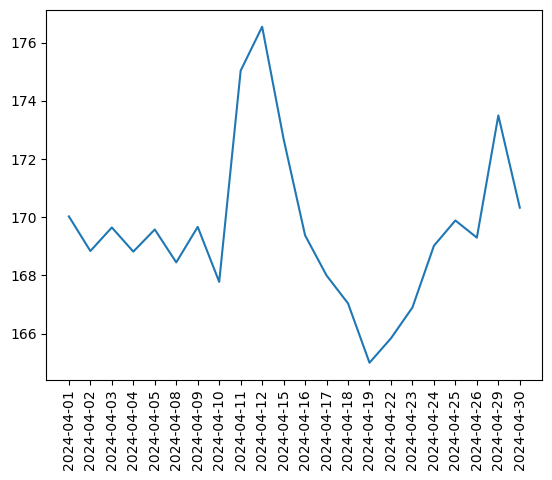

In [121]:
data_4 = data[data['Month']==4]
plt.plot(data_4['Date'],data_4['Close/Last'])
# make the x-axis label lilted
plt.xticks(rotation=90)
plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, '2024-04-01'),
  Text(1, 0, '2024-04-02'),
  Text(2, 0, '2024-04-03'),
  Text(3, 0, '2024-04-04'),
  Text(4, 0, '2024-04-05'),
  Text(5, 0, '2024-04-08'),
  Text(6, 0, '2024-04-09'),
  Text(7, 0, '2024-04-10'),
  Text(8, 0, '2024-04-11'),
  Text(9, 0, '2024-04-12'),
  Text(10, 0, '2024-04-15'),
  Text(11, 0, '2024-04-16'),
  Text(12, 0, '2024-04-17'),
  Text(13, 0, '2024-04-18'),
  Text(14, 0, '2024-04-19'),
  Text(15, 0, '2024-04-22'),
  Text(16, 0, '2024-04-23'),
  Text(17, 0, '2024-04-24'),
  Text(18, 0, '2024-04-25'),
  Text(19, 0, '2024-04-26'),
  Text(20, 0, '2024-04-29'),
  Text(21, 0, '2024-04-30')])

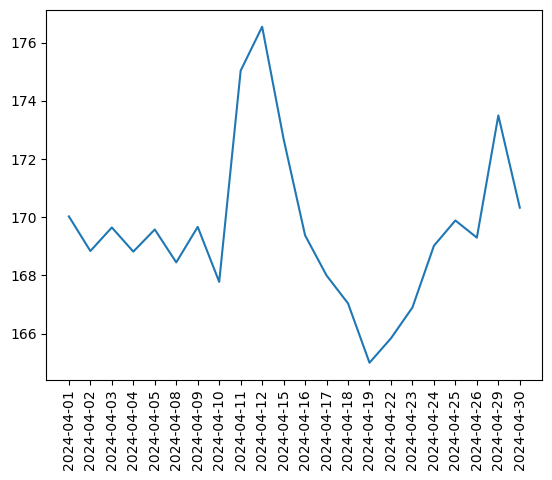

In [246]:
data_4 = data[data['Month']==4]
# data_4 = data[(data['Date'] >= '2024-04-01') & (data['Date'] <= '2024-04-11')]
plt.plot(data_4['Date'],data_4['Close/Last'])
# make the x-axis label lilted
plt.xticks(rotation=90)
plt.show()

In [247]:
# get all data of month == 4
data_4 = data[data['Month']==4]
# get all data from 2024-04-08 to 2024-04-25
# data_4 = data[(data['Date'] >= '2024-04-05') & (data['Date'] <= '2024-04-25')]
# data_4 = data[(data['Date'] >= '2024-04-01') & (data['Date'] <= '2024-04-11')]
# take out the Close/Last column and make it as a list
price_4 = data_4['Close/Last'].tolist()
# take out the Date column and make it as a list
date_4 = data_4['Date'].tolist()

In [249]:
one_pass_bar_algorithm(price_4, date_4)

(normal)Bar: (2024-04-03, 169.65) to (2024-04-02, 168.84)
(normal)Bar: (2024-04-05, 169.58) to (2024-04-04, 168.82)
(normal)Bar: (2024-04-09, 169.67) to (2024-04-08, 168.45)
(normal)Bar: (2024-04-01, 170.03) to (2024-04-10, 167.78)
(normal)Bar: (2024-04-25, 169.89) to (2024-04-26, 169.3)
(remaining)Bar: (2024-04-12, 176.55) to (2024-04-19, 165.0)
(remaining)Bar: (2024-04-29, 173.5) to (2024-04-30, 170.33)


After testing for small cases, we can see the algorithm can find the bar from time_series data and the assignment of each bar is left display if the first element of the tuples is smaller for the first one i.e. Bar: (1, 216.67) to (6, 193.12); while the bar is right display if the first element of the tuples is larger for the first one i.e. Bar: (3, 214.24) to (2, 212.49)

The folling one is wrong

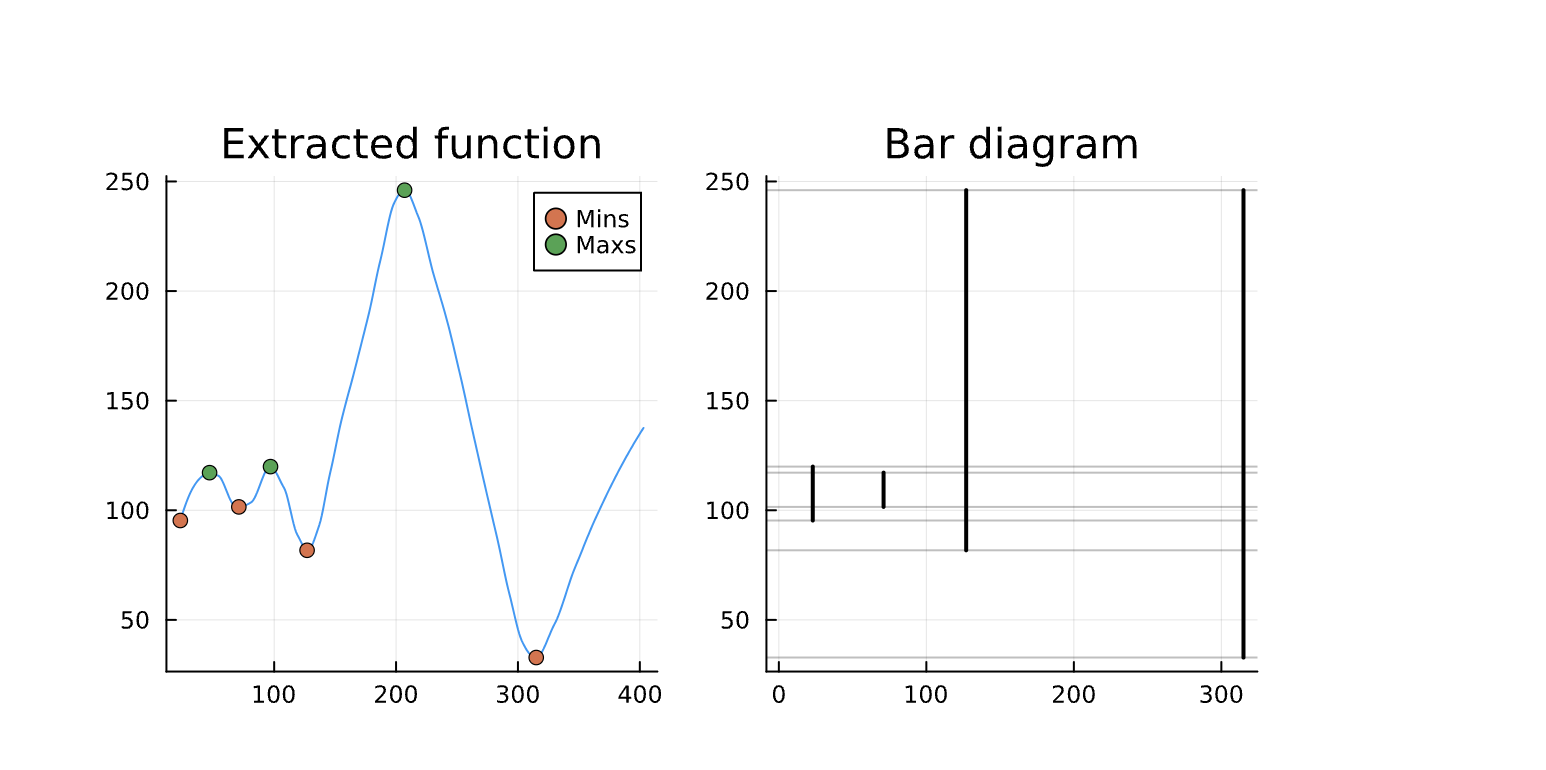

correct version

In [248]:
def one_pass_bar_algorithm(time_series, date_list=None):
    maxima, minima = [], []
    direction = 1

    # add a very small point at the front of the time_series
    time_series = [time_series[0] - 1e-6] + time_series
    # add a very big point at the end of the time_series
    time_series = time_series + [time_series[-1] + 1e-6]

    for t in range(0, len(time_series)-1):
        if (time_series[t+1] - time_series[t]) * direction < 0:
            if direction == 1:
                if len(maxima) != 0 and time_series[t] > maxima[-1][1]:
                    output_bar(maxima.pop(), minima.pop(),date_list)
                maxima.append((t, time_series[t])) 
            else:
                if len(minima) != 0 and time_series[t] < minima[-1][1]:
                    output_bar(maxima.pop(), minima.pop(),date_list)
                minima.append((t, time_series[t]))
            direction = -direction
        else:
          if direction == 1 and len(maxima) != 0 and time_series[t] > maxima[-1][1]:
              output_bar(maxima.pop(), minima.pop(),date_list)
          elif direction == -1 and len(minima) != 0 and time_series[t] < minima[-1][1]:
              output_bar(maxima.pop(), minima.pop(),date_list)
    output_remaining_bars(maxima, minima, date_list)

def output_bar(max_value, min_value, date_list):
    if date_list is None:
        print(f"(normal)Bar: ({max_value[0]}, {max_value[1]}) to ({min_value[0]}, {min_value[1]})")
    else:
        print(f"(normal)Bar: ({date_list[max_value[0]-1]}, {max_value[1]}) to ({date_list[min_value[0]-1]}, {min_value[1]})")

def output_remaining_bars(maxima, minima, date_list):
    if date_list is None:
        for i in range(min(len(maxima), len(minima))):
            print(f"(remaining)Bar: ({maxima[i][0]}, {maxima[i][1]}) to ({minima[i][0]}, {minima[i][1]})")
    else:
        for i in range(min(len(maxima), len(minima))):
            print(f"(remaining)Bar: ({date_list[maxima[i][0]-1]}, {maxima[i][1]}) to ({date_list[minima[i][0]-1]}, {minima[i][1]})")

In [ ]:
def check_continous(time_series, date_list=None):
    continuous = False
    turning_points = 0
    diff = []
    for i in range(1, len(time_series)):
        diff.append(i - turning_points)
        if diff[-1] == diff[-2]:
            continuous = True
        else:
            continuous = False
            turning_points = 0
            diff = []
    return continuous

In [220]:
def one_pass_bar_algorithm(time_series, date_list=None):
    maxima, minima = [], []
    direction = 1

    # add a very small point at the front of the time_series
    time_series = [time_series[0] - 1e-6] + time_series
    # add a very big point at the end of the time_series
    time_series = time_series + [time_series[-1] + 1e-6]

    for t in range(1, len(time_series)):
        if (time_series[t] - time_series[t-1]) * direction < 0:
            if direction == 1:
                maxima.append((t-1, time_series[t-1]))
            else:
                minima.append((t-1, time_series[t-1]))
            direction = -direction
        else:
          if direction == 1 and len(maxima) != 0 and time_series[t] > maxima[0][1]:
              output_bar(maxima.pop(), minima.pop(),date_list)
          elif direction == -1 and len(minima) != 0 and time_series[t] < minima[0][1]:
              output_bar(maxima.pop(), minima.pop(),date_list)
    output_remaining_bars(maxima, minima, date_list)

def output_bar(max_value, min_value, date_list):
    if date_list is None:
        print(f"(normal)Bar: ({max_value[0]}, {max_value[1]}) to ({min_value[0]}, {min_value[1]})")
    else:
        print(f"(normal)Bar: ({date_list[max_value[0]-1]}, {max_value[1]}) to ({date_list[min_value[0]-1]}, {min_value[1]})")

def output_remaining_bars(maxima, minima, date_list):
    if date_list is None:
        for i in range(min(len(maxima), len(minima))):
            print(f"(remaining)Bar: ({maxima[i][0]}, {maxima[i][1]}) to ({minima[i][0]}, {minima[i][1]})")
    else:
        for i in range(min(len(maxima), len(minima))):
            print(f"(remaining)Bar: ({date_list[maxima[i][0]-1]}, {maxima[i][1]}) to ({date_list[minima[i][0]-1]}, {minima[i][1]})")

In [213]:
def one_pass_bar_algorithm(time_series, date_list=None):
    maxima, minima = [], []
    direction = 1
    turning_points = 0

    # add a very small point at the front of the time_series
    time_series = [time_series[0] - 1e-6] + time_series
    # add a very big point at the end of the time_series
    time_series = time_series + [time_series[-1] + 1e-6]

    for t in range(1, len(time_series)):
        if (time_series[t] - time_series[t-1]) * direction < 0 and turning_points < 4:
            if direction == 1:
                maxima.append((t-1, time_series[t-1]))
            else:
                minima.append((t-1, time_series[t-1]))
            direction = -direction
            turning_points += 1
        else:
            print_flag = check_to_output_bars(time_series, maxima, minima, direction, t, date_list)
            turning_points = 0
        if turning_points == 4:
            print_flag = check_to_output_bars(time_series, maxima, minima, direction, t, date_list)
            if print_flag == 1:
                turning_points = 1
            else:
                turning_points = 4
    output_remaining_bars(maxima, minima, date_list)
          


def check_to_output_bars(time_series, maxima, minima, direction, t, date_list):
    print_flag = 0
    if direction == 1 and len(maxima) != 0 and time_series[t] > maxima[0][1]:
        output_bar(maxima.pop(), minima.pop(),date_list)
        print_flag = 1
    elif direction == -1 and len(minima) != 0 and time_series[t] < minima[0][1]:
        output_bar(maxima.pop(), minima.pop(),date_list)
        print_flag = 1
    return print_flag

def output_bar(max_value, min_value, date_list):
    if date_list is None:
        print(f"(normal)Bar: ({max_value[0]}, {max_value[1]}) to ({min_value[0]}, {min_value[1]})")
    else:
        print(f"(normal)Bar: ({date_list[max_value[0]-1]}, {max_value[1]}) to ({date_list[min_value[0]-1]}, {min_value[1]})")

def output_remaining_bars(maxima, minima, date_list):
    if date_list is None:
        for i in range(min(len(maxima), len(minima))):
            print(f"(remaining)Bar: ({maxima[i][0]}, {maxima[i][1]}) to ({minima[i][0]}, {minima[i][1]})")
    else:
        for i in range(min(len(maxima), len(minima))):
            print(f"(remaining)Bar: ({date_list[maxima[i][0]-1]}, {maxima[i][1]}) to ({date_list[minima[i][0]-1]}, {minima[i][1]})")


In [217]:
def one_pass_bar_algorithm(time_series, date_list=None):
    maxima, minima = [], []
    direction = 1
    turning_points = 0

    # add a very small point at the front of the time_series
    time_series = [time_series[0] - 1e-6] + time_series
    # add a very big point at the end of the time_series
    time_series = time_series + [time_series[-1] + 1e-6]

    for t in range(1, len(time_series)):
        print(f"[Debug]current: {t}")
        # add a judgement to check if the turningpoint is increasing as t is increasing
        flag = 0
        if turning_points 


        if (time_series[t] - time_series[t-1]) * direction < 0 and turning_points < 4:
            if direction == 1:
                maxima.append((t-1, time_series[t-1]))
                print(f"[Debug]Maxima: {maxima}")
            else:
                minima.append((t-1, time_series[t-1]))
                print(f"[Debug]Minima: {minima}")
            direction = -direction
            turning_points += 1
            print(f"[Debug]Turning points: {turning_points}")
        else:
            print_flag = check_to_output_bars(time_series, maxima, minima, direction, t, date_list)
            turning_points = 0
        if turning_points == 4:
            print_flag = check_to_output_bars(time_series, maxima, minima, direction, t, date_list)
            if print_flag == 1:
                turning_points = 1
            else:
                turning_points = 4
    output_remaining_bars(maxima, minima, date_list)
          


def check_to_output_bars(time_series, maxima, minima, direction, t, date_list):
    print_flag = 0
    if direction == 1 and len(maxima) != 0 and time_series[t] > maxima[-1][1]:
        output_bar(maxima.pop(), minima.pop(),date_list)
        print(f"[Debug]Maxima after: {maxima}")
        print(f"[Debug]Minima after: {minima}")
        print_flag = 1
    elif direction == -1 and len(minima) != 0 and time_series[t] < minima[-1][1]:
        output_bar(maxima.pop(), minima.pop(),date_list)
        print(f"[Debug]Maxima after: {maxima}")
        print(f"[Debug]Minima after: {minima}")
        print_flag = 1
    return print_flag

def output_bar(max_value, min_value, date_list):
    if date_list is None:
        print(f"(normal)Bar: ({max_value[0]}, {max_value[1]}) to ({min_value[0]}, {min_value[1]})")
    else:
        print(f"(normal)Bar: ({date_list[max_value[0]-1]}, {max_value[1]}) to ({date_list[min_value[0]-1]}, {min_value[1]})")

def output_remaining_bars(maxima, minima, date_list):
    if date_list is None:
        for i in range(min(len(maxima), len(minima))):
            print(f"(remaining)Bar: ({maxima[i][0]}, {maxima[i][1]}) to ({minima[i][0]}, {minima[i][1]})")
    else:
        for i in range(min(len(maxima), len(minima))):
            print(f"(remaining)Bar: ({date_list[maxima[i][0]-1]}, {maxima[i][1]}) to ({date_list[minima[i][0]-1]}, {minima[i][1]})")


In [153]:
def one_pass_bar_algorithm(time_series, date_list=None):
    maxima, minima = [], []
    direction = 1
    turining_point = 0

    # add a very small point at the front of the time_series
    time_series = [time_series[0] - 1e-6] + time_series
    # add a very big point at the end of the time_series
    time_series = time_series + [time_series[-1] + 1e-6]
    print(f"[Debug]Time series: {time_series}")

    for t in range(1, len(time_series)):
        if (time_series[t] - time_series[t-1]) * direction < 0 and turining_point < 3:
            if direction == 1:
                maxima.append((t-1, time_series[t-1]))
            else:
                minima.append((t-1, time_series[t-1]))
            direction = -direction
            turining_point += 1
        elif (time_series[t] - time_series[t-1]) * direction < 0 and turining_point == 3:
            if direction == 1 and len(maxima) != 0 and time_series[t] > maxima[0][1]:
              print(f"[Debug]Maxima: {maxima}")
              print(f"[Debug]Minima: {minima}")
              print(f"[Debug]Turning point: {turining_point}")
              output_bar(maxima.pop(), minima.pop(),date_list)
            elif direction == -1 and len(minima) != 0 and time_series[t] < minima[0][1]:
              
              print(f"[Debug]Maxima: {maxima}")
              print(f"[Debug]Minima: {minima}")
              print(f"[Debug]Turning point: {turining_point}")
              output_bar(maxima.pop(), minima.pop(),date_list)
            # reset the turning point and start a new cycle
            turining_point = 0

        else:
          if direction == 1 and len(maxima) != 0 and time_series[t] > maxima[0][1]:
            
              print(f"[Debug]Maxima: {maxima}")
              print(f"[Debug]Minima: {minima}")
              print(f"[Debug]Turning point: {turining_point}")
              output_bar(maxima.pop(), minima.pop(),date_list)
          elif direction == -1 and len(minima) != 0 and time_series[t] < minima[0][1]:
              output_bar(maxima.pop(), minima.pop(),date_list)
              print(f"[Debug]Maxima: {maxima}")
              print(f"[Debug]Minima: {minima}")
              print(f"[Debug]Turning point: {turining_point}")
              output_bar(maxima.pop(), minima.pop(),date_list)
          turining_point = 0
    output_remaining_bars(maxima, minima, date_list)

def output_bar(max_value, min_value, date_list):
    if date_list is None:
        print(f"(normal)Bar: ({max_value[0]}, {max_value[1]}) to ({min_value[0]}, {min_value[1]})")
    else:
        print(f"(normal)Bar: ({date_list[max_value[0]-1]}, {max_value[1]}) to ({date_list[min_value[0]-1]}, {min_value[1]})")

The following one wrong

In [257]:
# Load the data
data = pd.read_csv('/Users/eeevashen/Desktop/NWSS.csv',low_memory=False)
# print the first 5 rows of the data and the last 5 rows of the data
print(data.head())


# fix one specfice key_plot_id and take out the date_start and Difference column
data = data[data['key_plot_id']=="CDC_BIOBOT_in_1293_Treatment plant_raw wastewater"]
data = data[['date_start','Differences']]

  wwtp_jurisdiction  wwtp_id  \
0           Indiana   1293.0   
1           Indiana   1293.0   
2           Indiana   1293.0   
3           Indiana   1293.0   
4           Indiana   1293.0   

                                         key_plot_id county_names county_fips  \
0  CDC_BIOBOT_in_1293_Treatment plant_raw wastewater    St Joseph       18141   
1  CDC_BIOBOT_in_1293_Treatment plant_raw wastewater    St Joseph       18141   
2  CDC_BIOBOT_in_1293_Treatment plant_raw wastewater    St Joseph       18141   
3  CDC_BIOBOT_in_1293_Treatment plant_raw wastewater    St Joseph       18141   
4  CDC_BIOBOT_in_1293_Treatment plant_raw wastewater    St Joseph       18141   

   date_start    date_end  percentile first_sample_date  Differences  
0  2023-06-12  2023-06-26         6.0        2023-06-25          0.0  
1  2023-06-13  2023-06-27         3.0        2023-06-25         -3.0  
2  2023-06-14  2023-06-28         3.0        2023-06-25          0.0  
3  2023-06-15  2023-06-29         3.

In [260]:
# make the date_start column as string as the format of 'YYYY-MM-DD'
data['date_start'] = pd.to_datetime(data['date_start'])
data['date_start'] = data['date_start'].dt.strftime('%Y-%m-%d')
# make the Differences column as float
data['Differences'] = data['Differences'].astype(float)
# make them as two lists
date = data['date_start'].tolist()
diff = data['Differences'].tolist()



one_pass_bar_algorithm(diff, date)

(normal)Bar: (2023-06-12, 0.0) to (2023-06-13, -3.0)
(normal)Bar: (2023-06-20, 1.1669999999999998) to (2023-06-24, 0.0)
(normal)Bar: (2023-06-25, 4.300000000000001) to (2023-06-26, 0.0)
(normal)Bar: (2023-07-09, 7.75) to (2023-07-10, 0.0)
(normal)Bar: (2023-07-11, 9.5) to (2023-07-08, 0.0)
(normal)Bar: (2023-07-18, 7.549999999999997) to (2023-07-29, 0.0)
(normal)Bar: (2023-07-30, 15.200000000000005) to (2023-07-16, -6.25)
(normal)Bar: (2023-08-22, 3.0) to (2023-08-01, -8.332999999999998)
(remaining)Bar: (2023-06-18, 5.333) to (2023-06-19, 0.0)
(remaining)Bar: (2023-06-27, 13.8) to (2023-07-03, 0.0)
(remaining)Bar: (2023-07-04, 11.65) to (2023-08-27, -13.667000000000002)
(remaining)Bar: (2023-08-28, 0.0) to (2023-08-29, -5.082999999999998)


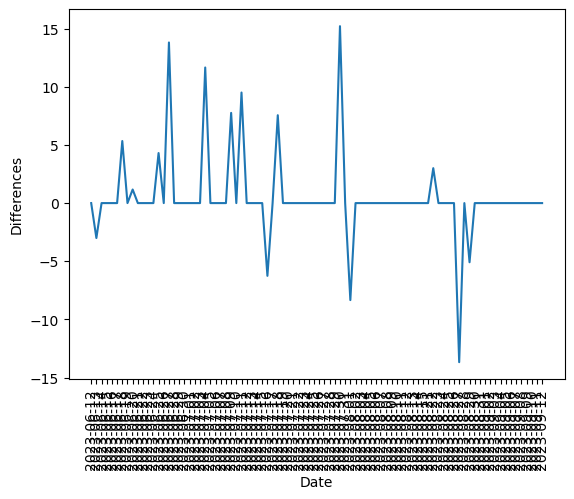

In [261]:
# plot the difference and date_start
plt.plot(data['date_start'],data['Differences'])
plt.xlabel('Date')
plt.ylabel('Differences')
plt.xticks(rotation=90)
plt.show()